In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import gensim
import gensim.downloader

print(list(gensim.downloader.info()["models"].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
import gensim.downloader as api

glove_wiki_vectors = api.load("glove-wiki-gigaword-100")

In [8]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# 1. Read and Split dataset 

In [28]:
fakepost_df = pd.read_csv("data/FakePostings.csv", index_col=0)
print(fakepost_df.head())

                                            title            location  \
job_id                                                                  
1                                Marketing Intern    US, NY, New York   
2       Customer Service - Cloud Video Production      NZ, , Auckland   
3         Commissioning Machinery Assistant (CMA)       US, IA, Wever   
4               Account Executive - Washington DC  US, DC, Washington   
5                             Bill Review Manager  US, FL, Fort Worth   

       department salary_range  \
job_id                           
1       Marketing          NaN   
2         Success          NaN   
3             NaN          NaN   
4           Sales          NaN   
5             NaN          NaN   

                                          company_profile  \
job_id                                                      
1       We're Food52, and we've created a groundbreaki...   
2       90 Seconds, the worlds Cloud Video Production ...   
3    

In [32]:
train_df, test_df = train_test_split(fakepost_df, test_size=0.35, random_state = 123)
X_train = train_df.drop(columns=["fraudulent"])
y_train = train_df["fraudulent"]
X_test = test_df.drop(columns=["fraudulent"])
y_test = test_df["fraudulent"]

# 2. EDA

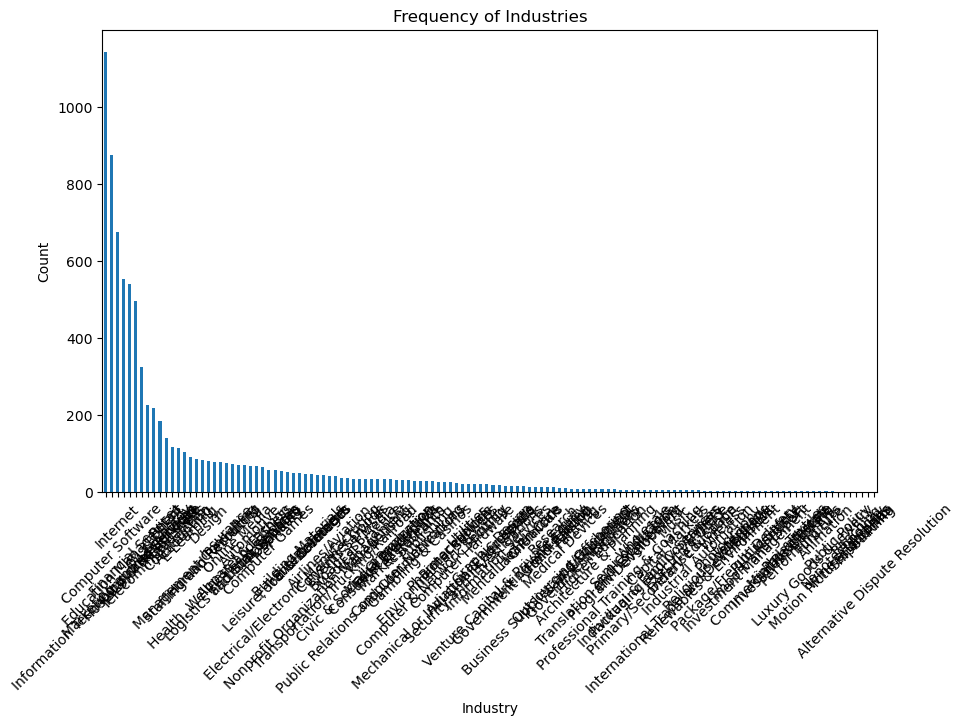

In [33]:
industry_counts = train_df['industry'].value_counts()
industry_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


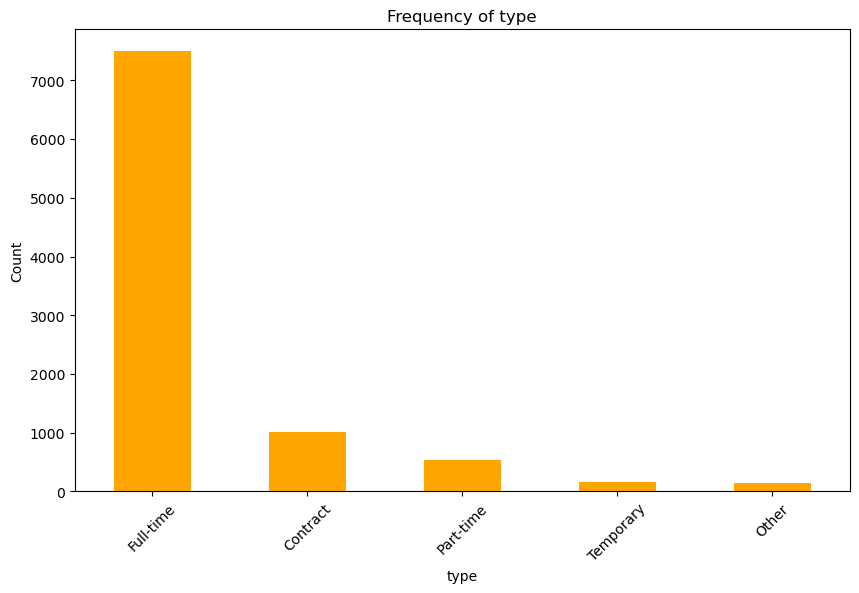

In [34]:
benefits_counts = train_df['employment_type'].value_counts()

benefits_counts.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Frequency of type')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


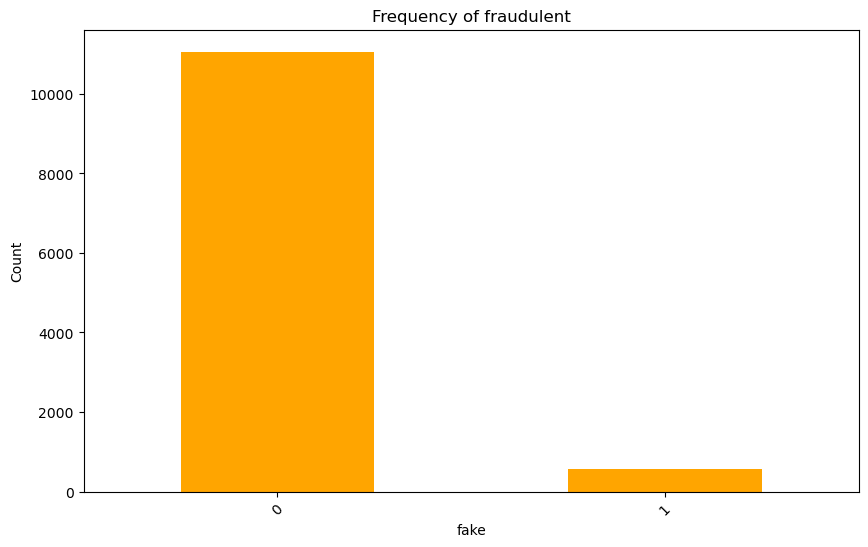

In [36]:
f_counts = train_df['fraudulent'].value_counts()

f_counts.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Frequency of fraudulent')
plt.xlabel('fake')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
fakepost_df['salary_range'] = fakepost_df['salary_range'].replace('', np.nan)

### split the salary range into lower bound and upper bound

In [45]:
fakepost_df[['lower_bound', 'upper_bound']] = fakepost_df['salary_range'].str.split('-', expand=True)
fakepost_df['lower_bound'] = pd.to_numeric(fakepost_df['lower_bound'], errors='coerce')
fakepost_df['upper_bound'] = pd.to_numeric(fakepost_df['upper_bound'], errors='coerce')

NameError: name 'plot_feature_histogram' is not defined